In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train_AUpWtIz/train.csv')
campaign_data = pd.read_csv('train_AUpWtIz/campaign_data.csv')
coupon_item_mapping = pd.read_csv('train_AUpWtIz/coupon_item_mapping.csv')
customer_demographics = pd.read_csv('train_AUpWtIz/customer_demographics.csv')
customer_transaction_data = pd.read_csv('train_AUpWtIz/customer_transaction_data.csv',mangle_dupe_cols=True,nrows=463598)
item_data = pd.read_csv('train_AUpWtIz/item_data.csv')

In [3]:
print(len(train))
train.info()

78369
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
dtypes: int64(5)
memory usage: 3.0 MB


In [4]:
train_campaign = pd.merge(train,campaign_data,how='left',on='campaign_id')

In [5]:
print(len(train))
train.info()

78369
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
dtypes: int64(5)
memory usage: 3.0 MB


In [6]:
train_campaign.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date
0,1,13,27,1053,0,X,19/05/13,05/07/13
1,2,13,116,48,0,X,19/05/13,05/07/13
2,6,9,635,205,0,Y,11/03/13,12/04/13
3,7,13,644,1050,0,X,19/05/13,05/07/13
4,9,8,1017,1489,0,X,16/02/13,05/04/13


In [7]:
train_coustomer_demographics = pd.merge(train_campaign,customer_demographics,how='left',on='customer_id')

In [8]:
len(train_coustomer_demographics)

78369

In [9]:
train_coustomer_demographics.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,13,27,1053,0,X,19/05/13,05/07/13,46-55,NaN,0.0,1,NaN,5.0
1,2,13,116,48,0,X,19/05/13,05/07/13,36-45,Married,0.0,2,NaN,3.0
2,6,9,635,205,0,Y,11/03/13,12/04/13,46-55,Married,0.0,2,NaN,7.0
3,7,13,644,1050,0,X,19/05/13,05/07/13,NaN,NaN,NaN,NaN,NaN,NaN
4,9,8,1017,1489,0,X,16/02/13,05/04/13,46-55,Married,0.0,2,NaN,3.0


In [10]:
coupon_item = pd.merge(coupon_item_mapping,item_data,how='left',on='item_id')

In [11]:
coupon_item.head()

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,Local,Grocery
1,107,75,56,Local,Grocery
2,494,76,209,Established,Grocery
3,522,77,278,Established,Grocery
4,518,77,278,Established,Grocery


In [12]:
coupon_item.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92663 entries, 0 to 92662
Data columns (total 5 columns):
coupon_id     92663 non-null int64
item_id       92663 non-null int64
brand         92663 non-null int64
brand_type    92663 non-null object
category      92663 non-null object
dtypes: int64(3), object(2)
memory usage: 4.2+ MB


In [13]:
customer_transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


# EDA on customer Transaction Data

In [14]:
len(customer_transaction_data)

463598

In [15]:
customer_transaction_data_agg = customer_transaction_data.groupby(['date','customer_id']).agg('sum').reset_index()

In [16]:
len(customer_transaction_data_agg)

50766

In [17]:
customer_transaction_data_agg.isnull().sum()

date               0
customer_id        0
item_id            0
quantity           0
selling_price      0
other_discount     0
coupon_discount    0
dtype: int64

In [18]:
customer_transaction_data_agg.head(200)

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,67,83833,7,192.34,-14.96,0.00
1,2012-01-02,135,501452,25,2248.67,-425.65,0.00
2,2012-01-02,464,1845933,90,5189.79,-1733.21,-330.91
3,2012-01-02,679,1089746,50,4466.01,-612.66,0.00
4,2012-01-02,751,338705,12,1142.33,-310.60,0.00
...,...,...,...,...,...,...,...
195,2012-01-11,1568,240259,6,303.50,-136.06,0.00
196,2012-01-12,9,902848,41,3082.89,-487.98,0.00
197,2012-01-12,17,117679,5,420.67,-52.35,0.00
198,2012-01-12,86,219250,10,753.36,-336.60,0.00


In [19]:
cols1 = customer_transaction_data_agg.columns
cols1 = ['customer_id', 'quantity', 'selling_price', 'other_discount', 'coupon_discount'],

In [20]:
agg_funcs = dict(Size='size', Sum='sum', Mean='mean', Std='std')
customer_transaction_data['date'] = pd.to_datetime(customer_transaction_data['date'],format='%Y-%m-%d')
customer_transaction_data['Transaction_date_WEEKDAY'] = ((pd.DatetimeIndex(customer_transaction_data.date).dayofweek) // 5 == 1).astype(float)
df_p = customer_transaction_data.groupby(['date','customer_id']).agg(['sum','size','mean']).reset_index()
df_custome = customer_transaction_data.groupby(['customer_id']).agg(['sum','size','mean']).reset_index()


In [21]:
df_p.head(100)

date customer_id  item_id                    quantity                 \
                               sum size          mean      sum size      mean   
0  2012-01-02          67    83833    4  20958.250000        7    4  1.750000   
1  2012-01-02         135   501452   20  25072.600000       25   20  1.250000   
2  2012-01-02         464  1845933   68  27146.073529       90   68  1.323529   
3  2012-01-02         679  1089746   44  24766.954545       50   44  1.136364   
4  2012-01-02         751   338705   11  30791.363636       12   11  1.090909   
..        ...         ...      ...  ...           ...      ...  ...       ...   
95 2012-01-07        1467   134253    4  33563.250000        5    4  1.250000   
96 2012-01-07        1468   463163   17  27244.882353       27   17  1.588235   
97 2012-01-07        1469   187856    9  20872.888889       12    9  1.333333   
98 2012-01-08          52   295239    9  32804.333333        9    9  1.000000   
99 2012-01-08          79   591085   22  26867.500000       34   22  1.545455   

   selling_price                  other_discount                  \
             sum size        mean            sum size       mean   
0         192.34    4   48.085000         -14.96    4  -3.740000   
1        2248.67   20  112.433500        -425.65   20 -21.282500   
2        5189.79   68   76.320441       -1733.21   68 -25.488382   
3        4466.01   44  101.500227        -612.66   44 -13.924091   
4        1142.33   11  103.848182        -310.60   11 -28.236364   
..           ...  ...         ...            ...  ...        ...   
95        559.59    4  139.897500        -236.51    4 -59.127500   
96       1531.29   17   90.075882        -499.38   17 -29.375294   
97       2110.11    9  234.456667        -671.08    9 -74.564444   
98        850.24    9   94.471111        -189.14    9 -21.015556   
99       1968.69   22   89.485909        -201.24   22  -9.147273   

   coupon_discount                Transaction_date_WEEKDAY            
               sum size      mean                      sum size mean  
0             0.00    4  0.000000                      0.0    4  0.0  
1             0.00   20  0.000000                      0.0   20  0.0  
2          -330.91   68 -4.866324                      0.0   68  0.0  
3             0.00   44  0.000000                      0.0   44  0.0  
4             0.00   11  0.000000                      0.0   11  0.0  
..             ...  ...       ...                      ...  ...  ...  
95            0.00    4  0.000000                      4.0    4  1.0  
96            0.00   17  0.000000                     17.0   17  1.0  
97            0.00    9  0.000000                      9.0    9  1.0  
98            0.00    9  0.000000                      9.0    9  1.0  
99            0.00   22  0.000000                     22.0   22  1.0  

[100 rows x 20 columns]

In [22]:
df_p.isnull().sum()

date                              0
customer_id                       0
item_id                   sum     0
                          size    0
                          mean    0
quantity                  sum     0
                          size    0
                          mean    0
selling_price             sum     0
                          size    0
                          mean    0
other_discount            sum     0
                          size    0
                          mean    0
coupon_discount           sum     0
                          size    0
                          mean    0
Transaction_date_WEEKDAY  sum     0
                          size    0
                          mean    0
dtype: int64

# Flatten the multi index

In [23]:
df_custome.columns = ['_'.join(col).strip() for col in df_custome.columns.values]

In [24]:
df_custome.head()

,customer_id_,item_id_sum,item_id_size,item_id_mean,quantity_sum,quantity_size,quantity_mean,selling_price_sum,selling_price_size,selling_price_mean,other_discount_sum,other_discount_size,other_discount_mean,coupon_discount_sum,coupon_discount_size,coupon_discount_mean,Transaction_date_WEEKDAY_sum,Transaction_date_WEEKDAY_size,Transaction_date_WEEKDAY_mean
0,1,10875878,373,29157.849866,450,373,1.206434,35926.85,373,96.318633,-6817.25,373,-18.276810,-425.64,373,-1.141126,93.0,373,0.249330
1,2,4805428,172,27938.534884,195,172,1.133721,16733.46,172,97.287558,-3561.24,172,-20.704884,-178.10,172,-1.035465,57.0,172,0.331395
2,3,9059647,328,27620.875000,577,328,1.759146,34151.68,328,104.120976,-7741.63,328,-23.602530,-1066.79,328,-3.252409,38.0,328,0.115854
3,4,3279870,124,26450.564516,160,124,1.290323,17455.92,124,140.773548,-1654.89,124,-13.345887,-89.05,124,-0.718145,91.0,124,0.733871
4,5,8716687,288,30266.274306,352,288,1.222222,31899.63,288,110.762604,-3521.71,288,-12.228160,-19.59,288,-0.068021,97.0,288,0.336806


In [25]:
df_custome.drop(['item_id_sum','item_id_mean'],axis=1,inplace=True)

In [26]:
df_custome.isnull().sum()

customer_id_                     0
item_id_size                     0
quantity_sum                     0
quantity_size                    0
quantity_mean                    0
selling_price_sum                0
selling_price_size               0
selling_price_mean               0
other_discount_sum               0
other_discount_size              0
other_discount_mean              0
coupon_discount_sum              0
coupon_discount_size             0
coupon_discount_mean             0
Transaction_date_WEEKDAY_sum     0
Transaction_date_WEEKDAY_size    0
Transaction_date_WEEKDAY_mean    0
dtype: int64

In [27]:
df_custome.head(20)

,customer_id_,item_id_size,quantity_sum,quantity_size,quantity_mean,selling_price_sum,selling_price_size,selling_price_mean,other_discount_sum,other_discount_size,other_discount_mean,coupon_discount_sum,coupon_discount_size,coupon_discount_mean,Transaction_date_WEEKDAY_sum,Transaction_date_WEEKDAY_size,Transaction_date_WEEKDAY_mean
0,1,373,450,373,1.206434,35926.85,373,96.318633,-6817.25,373,-18.276810,-425.64,373,-1.141126,93.0,373,0.249330
1,2,172,195,172,1.133721,16733.46,172,97.287558,-3561.24,172,-20.704884,-178.10,172,-1.035465,57.0,172,0.331395
2,3,328,577,328,1.759146,34151.68,328,104.120976,-7741.63,328,-23.602530,-1066.79,328,-3.252409,38.0,328,0.115854
3,4,124,160,124,1.290323,17455.92,124,140.773548,-1654.89,124,-13.345887,-89.05,124,-0.718145,91.0,124,0.733871
4,5,288,352,288,1.222222,31899.63,288,110.762604,-3521.71,288,-12.228160,-19.59,288,-0.068021,97.0,288,0.336806
5,6,159,191,159,1.201258,18268.37,159,114.895409,-2204.44,159,-13.864403,-44.52,159,-0.280000,34.0,159,0.213836
6,7,359,47186,359,131.437326,38045.23,359,105.975571,-7076.56,359,-19.711866,-267.15,359,-0.744150,33.0,359,0.091922
7,8,434,445261,434,1025.947005,102494.66,434,236.162811,-11421.26,434,-26.316267,-2138.27,434,-4.926889,78.0,434,0.179724
8,9,183,22817,183,124.683060,17046.68,183,93.151257,-3496.01,183,-19.103880,-35.62,183,-0.194645,16.0,183,0.087432
9,10,226,23112,226,102.265487,22334.39,226,98.824735,-2722.01,226,-12.044292,0.00,226,0.000000,36.0,226,0.159292


In [28]:
C = np.where(((df_custome['item_id_size']==df_custome['quantity_size']) & (df_custome['selling_price_size']==df_custome['coupon_discount_size'])), True, False)

In [29]:
df_custome.columns

Index(['customer_id_', 'item_id_size', 'quantity_sum', 'quantity_size',
       'quantity_mean', 'selling_price_sum', 'selling_price_size',
       'selling_price_mean', 'other_discount_sum', 'other_discount_size',
       'other_discount_mean', 'coupon_discount_sum', 'coupon_discount_size',
       'coupon_discount_mean', 'Transaction_date_WEEKDAY_sum',
       'Transaction_date_WEEKDAY_size', 'Transaction_date_WEEKDAY_mean'],
      dtype='object')

In [30]:
len(C)

1580

In [31]:
sum(C)

1580

In [32]:
df_custome.drop(['item_id_size','quantity_size','selling_price_size','other_discount_size','Transaction_date_WEEKDAY_size'],axis=1,inplace=True)

In [33]:
df_custome.head(10)

,customer_id_,quantity_sum,quantity_mean,selling_price_sum,selling_price_mean,other_discount_sum,other_discount_mean,coupon_discount_sum,coupon_discount_size,coupon_discount_mean,Transaction_date_WEEKDAY_sum,Transaction_date_WEEKDAY_mean
0,1,450,1.206434,35926.85,96.318633,-6817.25,-18.276810,-425.64,373,-1.141126,93.0,0.249330
1,2,195,1.133721,16733.46,97.287558,-3561.24,-20.704884,-178.10,172,-1.035465,57.0,0.331395
2,3,577,1.759146,34151.68,104.120976,-7741.63,-23.602530,-1066.79,328,-3.252409,38.0,0.115854
3,4,160,1.290323,17455.92,140.773548,-1654.89,-13.345887,-89.05,124,-0.718145,91.0,0.733871
4,5,352,1.222222,31899.63,110.762604,-3521.71,-12.228160,-19.59,288,-0.068021,97.0,0.336806
5,6,191,1.201258,18268.37,114.895409,-2204.44,-13.864403,-44.52,159,-0.280000,34.0,0.213836
6,7,47186,131.437326,38045.23,105.975571,-7076.56,-19.711866,-267.15,359,-0.744150,33.0,0.091922
7,8,445261,1025.947005,102494.66,236.162811,-11421.26,-26.316267,-2138.27,434,-4.926889,78.0,0.179724
8,9,22817,124.683060,17046.68,93.151257,-3496.01,-19.103880,-35.62,183,-0.194645,16.0,0.087432
9,10,23112,102.265487,22334.39,98.824735,-2722.01,-12.044292,0.00,226,0.000000,36.0,0.159292


In [34]:
df_custome.isnull().sum()

customer_id_                     0
quantity_sum                     0
quantity_mean                    0
selling_price_sum                0
selling_price_mean               0
other_discount_sum               0
other_discount_mean              0
coupon_discount_sum              0
coupon_discount_size             0
coupon_discount_mean             0
Transaction_date_WEEKDAY_sum     0
Transaction_date_WEEKDAY_mean    0
dtype: int64

In [35]:
#sns.pairplot(df_custome,size=3)
df_custome.duplicated().sum()
train_coustomer_demographics.duplicated().sum()

0

In [36]:
df = pd.merge(train_coustomer_demographics,df_custome,how='left',left_on='customer_id',right_on='customer_id_')

In [37]:
len(df)

78369

In [38]:
len(train_coustomer_demographics)

78369

In [39]:
df.isnull().sum()

id                                   0
campaign_id                          0
coupon_id                            0
customer_id                          0
redemption_status                    0
campaign_type                        0
start_date                           0
end_date                             0
age_range                        34708
marital_status                   52975
rented                           34708
family_size                      34708
no_of_children                   64313
income_bracket                   34708
customer_id_                         0
quantity_sum                         0
quantity_mean                        0
selling_price_sum                    0
selling_price_mean                   0
other_discount_sum                   0
other_discount_mean                  0
coupon_discount_sum                  0
coupon_discount_size                 0
coupon_discount_mean                 0
Transaction_date_WEEKDAY_sum         0
Transaction_date_WEEKDAY_

In [40]:
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,...,quantity_mean,selling_price_sum,selling_price_mean,other_discount_sum,other_discount_mean,coupon_discount_sum,coupon_discount_size,coupon_discount_mean,Transaction_date_WEEKDAY_sum,Transaction_date_WEEKDAY_mean
0,1,13,27,1053,0,X,19/05/13,05/07/13,46-55,NaN,...,434.824324,10857.26,146.719730,-2073.11,-28.015000,0.00,74,0.000000,19.0,0.256757
1,2,13,116,48,0,X,19/05/13,05/07/13,36-45,Married,...,71.775758,52592.21,318.740667,-5913.95,-35.842121,-908.31,165,-5.504909,90.0,0.545455
2,6,9,635,205,0,Y,11/03/13,12/04/13,46-55,Married,...,1.537538,39628.89,119.005676,-6150.11,-18.468799,-991.66,333,-2.977958,43.0,0.129129
3,7,13,644,1050,0,X,19/05/13,05/07/13,NaN,NaN,...,1.365217,9775.45,85.003913,-1306.49,-11.360783,0.00,115,0.000000,11.0,0.095652
4,9,8,1017,1489,0,X,16/02/13,05/04/13,46-55,Married,...,137.019802,13015.15,128.862871,-2909.49,-28.806832,-19.59,101,-0.193960,54.0,0.534653


In [41]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [42]:
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,customer_id_,quantity_sum,quantity_mean,selling_price_sum,selling_price_mean,other_discount_sum,other_discount_mean,coupon_discount_sum,coupon_discount_size,coupon_discount_mean,Transaction_date_WEEKDAY_sum,Transaction_date_WEEKDAY_mean
0,1,13,27,1053,0,X,19/05/13,05/07/13,46-55,NaN,0.0,1,NaN,5.0,1053,32177,434.824324,10857.26,146.719730,-2073.11,-28.015000,0.00,74,0.000000,19.0,0.256757
1,2,13,116,48,0,X,19/05/13,05/07/13,36-45,Married,0.0,2,NaN,3.0,48,11843,71.775758,52592.21,318.740667,-5913.95,-35.842121,-908.31,165,-5.504909,90.0,0.545455
2,6,9,635,205,0,Y,11/03/13,12/04/13,46-55,Married,0.0,2,NaN,7.0,205,512,1.537538,39628.89,119.005676,-6150.11,-18.468799,-991.66,333,-2.977958,43.0,0.129129
3,7,13,644,1050,0,X,19/05/13,05/07/13,NaN,NaN,NaN,NaN,NaN,NaN,1050,157,1.365217,9775.45,85.003913,-1306.49,-11.360783,0.00,115,0.000000,11.0,0.095652
4,9,8,1017,1489,0,X,16/02/13,05/04/13,46-55,Married,0.0,2,NaN,3.0,1489,13839,137.019802,13015.15,128.862871,-2909.49,-28.806832,-19.59,101,-0.193960,54.0,0.534653


In [43]:
df.isnull().sum()/len(df)

id                               0.000000
campaign_id                      0.000000
coupon_id                        0.000000
customer_id                      0.000000
redemption_status                0.000000
campaign_type                    0.000000
start_date                       0.000000
end_date                         0.000000
age_range                        0.442879
marital_status                   0.675969
rented                           0.442879
family_size                      0.442879
no_of_children                   0.820643
income_bracket                   0.442879
customer_id_                     0.000000
quantity_sum                     0.000000
quantity_mean                    0.000000
selling_price_sum                0.000000
selling_price_mean               0.000000
other_discount_sum               0.000000
other_discount_mean              0.000000
coupon_discount_sum              0.000000
coupon_discount_size             0.000000
coupon_discount_mean             0

In [44]:
customer_demographics.isnull().sum()/len(customer_demographics)

customer_id       0.000000
age_range         0.000000
marital_status    0.432895
rented            0.000000
family_size       0.000000
no_of_children    0.707895
income_bracket    0.000000
dtype: float64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 26 columns):
id                               78369 non-null int64
campaign_id                      78369 non-null int64
coupon_id                        78369 non-null int64
customer_id                      78369 non-null int64
redemption_status                78369 non-null int64
campaign_type                    78369 non-null object
start_date                       78369 non-null object
end_date                         78369 non-null object
age_range                        43661 non-null object
marital_status                   25394 non-null object
rented                           43661 non-null float64
family_size                      43661 non-null object
no_of_children                   14056 non-null object
income_bracket                   43661 non-null float64
customer_id_                     78369 non-null int64
quantity_sum                     78369 non-null int64
quantity_mean   

In [46]:
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,customer_id_,quantity_sum,quantity_mean,selling_price_sum,selling_price_mean,other_discount_sum,other_discount_mean,coupon_discount_sum,coupon_discount_size,coupon_discount_mean,Transaction_date_WEEKDAY_sum,Transaction_date_WEEKDAY_mean
0,1,13,27,1053,0,X,19/05/13,05/07/13,46-55,NaN,0.0,1,NaN,5.0,1053,32177,434.824324,10857.26,146.719730,-2073.11,-28.015000,0.00,74,0.000000,19.0,0.256757
1,2,13,116,48,0,X,19/05/13,05/07/13,36-45,Married,0.0,2,NaN,3.0,48,11843,71.775758,52592.21,318.740667,-5913.95,-35.842121,-908.31,165,-5.504909,90.0,0.545455
2,6,9,635,205,0,Y,11/03/13,12/04/13,46-55,Married,0.0,2,NaN,7.0,205,512,1.537538,39628.89,119.005676,-6150.11,-18.468799,-991.66,333,-2.977958,43.0,0.129129
3,7,13,644,1050,0,X,19/05/13,05/07/13,NaN,NaN,NaN,NaN,NaN,NaN,1050,157,1.365217,9775.45,85.003913,-1306.49,-11.360783,0.00,115,0.000000,11.0,0.095652
4,9,8,1017,1489,0,X,16/02/13,05/04/13,46-55,Married,0.0,2,NaN,3.0,1489,13839,137.019802,13015.15,128.862871,-2909.49,-28.806832,-19.59,101,-0.193960,54.0,0.534653


# mapping X to 0 and Y to 1

In [47]:
df['campaign_type'] = df['campaign_type'].map({'X':0,'Y':1})

In [48]:
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,customer_id_,quantity_sum,quantity_mean,selling_price_sum,selling_price_mean,other_discount_sum,other_discount_mean,coupon_discount_sum,coupon_discount_size,coupon_discount_mean,Transaction_date_WEEKDAY_sum,Transaction_date_WEEKDAY_mean
0,1,13,27,1053,0,0,19/05/13,05/07/13,46-55,NaN,0.0,1,NaN,5.0,1053,32177,434.824324,10857.26,146.719730,-2073.11,-28.015000,0.00,74,0.000000,19.0,0.256757
1,2,13,116,48,0,0,19/05/13,05/07/13,36-45,Married,0.0,2,NaN,3.0,48,11843,71.775758,52592.21,318.740667,-5913.95,-35.842121,-908.31,165,-5.504909,90.0,0.545455
2,6,9,635,205,0,1,11/03/13,12/04/13,46-55,Married,0.0,2,NaN,7.0,205,512,1.537538,39628.89,119.005676,-6150.11,-18.468799,-991.66,333,-2.977958,43.0,0.129129
3,7,13,644,1050,0,0,19/05/13,05/07/13,NaN,NaN,NaN,NaN,NaN,NaN,1050,157,1.365217,9775.45,85.003913,-1306.49,-11.360783,0.00,115,0.000000,11.0,0.095652
4,9,8,1017,1489,0,0,16/02/13,05/04/13,46-55,Married,0.0,2,NaN,3.0,1489,13839,137.019802,13015.15,128.862871,-2909.49,-28.806832,-19.59,101,-0.193960,54.0,0.534653


In [49]:
#df.drop(['no_of_children'],axis=1,inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 26 columns):
id                               78369 non-null int64
campaign_id                      78369 non-null int64
coupon_id                        78369 non-null int64
customer_id                      78369 non-null int64
redemption_status                78369 non-null int64
campaign_type                    78369 non-null int64
start_date                       78369 non-null object
end_date                         78369 non-null object
age_range                        43661 non-null object
marital_status                   25394 non-null object
rented                           43661 non-null float64
family_size                      43661 non-null object
no_of_children                   14056 non-null object
income_bracket                   43661 non-null float64
customer_id_                     78369 non-null int64
quantity_sum                     78369 non-null int64
quantity_mean    

In [51]:
df.describe(percentiles=[0.25,0.5,0.75,0.80,0.85,0.9])

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,rented,income_bracket,customer_id_,quantity_sum,quantity_mean,selling_price_sum,selling_price_mean,other_discount_sum,other_discount_mean,coupon_discount_sum,coupon_discount_size,coupon_discount_mean,Transaction_date_WEEKDAY_sum,Transaction_date_WEEKDAY_mean
count,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,43661.000000,43661.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000
mean,64347.975449,13.974441,566.363243,787.451888,0.009302,0.263944,0.057374,4.802478,787.451888,47464.938368,119.749816,42271.172031,114.854468,-6774.795472,-18.702085,-214.498561,370.605788,-0.559437,96.688155,0.265287
std,37126.440855,8.019215,329.966054,456.811339,0.095999,0.440772,0.232558,2.344019,456.811339,87682.214460,212.689273,32453.173921,34.513533,5412.952863,9.961443,457.051914,264.282652,1.187826,86.511136,0.142493
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,1.000000,645.430000,40.124249,-45787.140000,-231.969310,-3937.000000,3.000000,-16.302821,0.000000,0.000000
25%,32260.000000,8.000000,280.000000,399.000000,0.000000,0.000000,0.000000,3.000000,399.000000,325.000000,1.264463,19405.850000,94.146724,-9048.120000,-21.610595,-213.720000,182.000000,-0.660360,35.000000,0.167331
50%,64318.000000,13.000000,597.000000,781.000000,0.000000,0.000000,0.000000,5.000000,781.000000,7048.000000,21.108434,32973.810000,109.394812,-5328.340000,-17.232568,-47.730000,304.000000,-0.145341,73.000000,0.256849
75%,96577.000000,13.000000,857.000000,1190.000000,0.000000,1.000000,0.000000,6.000000,1190.000000,56114.000000,161.114130,56037.900000,128.932123,-2917.200000,-13.751076,0.000000,489.000000,0.000000,136.000000,0.343373
80%,103049.400000,26.000000,909.000000,1271.000000,0.000000,1.000000,0.000000,6.000000,1271.000000,80763.000000,212.775736,63895.050000,135.181841,-2554.710000,-13.109011,0.000000,558.000000,0.000000,155.000000,0.372632
85%,109347.800000,26.000000,961.000000,1348.000000,0.000000,1.000000,0.000000,7.000000,1348.000000,106738.000000,278.042308,71792.060000,141.495689,-2180.280000,-12.206413,0.000000,643.000000,0.000000,175.000000,0.394004
90%,115869.400000,29.000000,1007.000000,1420.000000,0.000000,1.000000,0.000000,8.000000,1420.000000,149777.000000,367.265167,88071.780000,149.902310,-1696.180000,-11.242308,0.000000,750.000000,0.000000,202.000000,0.442029


In [52]:
redemption_status = (sum(df['redemption_status'])/len(df['redemption_status'].index))*100
redemption_status

0.930214753282548

In [53]:
redemption_status = (sum(train['redemption_status'])/len(train['redemption_status'].index))*100
redemption_status

0.930214753282548

In [54]:
df['start_date'] = pd.to_datetime(df['start_date'],format='%d/%m/%y')
df['end_date'] = pd.to_datetime(df['end_date'],format='%d/%m/%y')


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 26 columns):
id                               78369 non-null int64
campaign_id                      78369 non-null int64
coupon_id                        78369 non-null int64
customer_id                      78369 non-null int64
redemption_status                78369 non-null int64
campaign_type                    78369 non-null int64
start_date                       78369 non-null datetime64[ns]
end_date                         78369 non-null datetime64[ns]
age_range                        43661 non-null object
marital_status                   25394 non-null object
rented                           43661 non-null float64
family_size                      43661 non-null object
no_of_children                   14056 non-null object
income_bracket                   43661 non-null float64
customer_id_                     78369 non-null int64
quantity_sum                     78369 non-null int64
q

In [56]:
df.isnull().sum()

id                                   0
campaign_id                          0
coupon_id                            0
customer_id                          0
redemption_status                    0
campaign_type                        0
start_date                           0
end_date                             0
age_range                        34708
marital_status                   52975
rented                           34708
family_size                      34708
no_of_children                   64313
income_bracket                   34708
customer_id_                         0
quantity_sum                         0
quantity_mean                        0
selling_price_sum                    0
selling_price_mean                   0
other_discount_sum                   0
other_discount_mean                  0
coupon_discount_sum                  0
coupon_discount_size                 0
coupon_discount_mean                 0
Transaction_date_WEEKDAY_sum         0
Transaction_date_WEEKDAY_

In [57]:
df['Start_WEEKDAY'] = ((pd.DatetimeIndex(df.start_date).dayofweek) // 5 == 1).astype(float)

In [58]:
df['end_WEEKDAY'] = ((pd.DatetimeIndex(df.end_date).dayofweek) // 5 == 1).astype(float)

In [59]:
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,customer_id_,quantity_sum,quantity_mean,selling_price_sum,selling_price_mean,other_discount_sum,other_discount_mean,coupon_discount_sum,coupon_discount_size,coupon_discount_mean,Transaction_date_WEEKDAY_sum,Transaction_date_WEEKDAY_mean,Start_WEEKDAY,end_WEEKDAY
0,1,13,27,1053,0,0,2013-05-19,2013-07-05,46-55,NaN,0.0,1,NaN,5.0,1053,32177,434.824324,10857.26,146.719730,-2073.11,-28.015000,0.00,74,0.000000,19.0,0.256757,1.0,0.0
1,2,13,116,48,0,0,2013-05-19,2013-07-05,36-45,Married,0.0,2,NaN,3.0,48,11843,71.775758,52592.21,318.740667,-5913.95,-35.842121,-908.31,165,-5.504909,90.0,0.545455,1.0,0.0
2,6,9,635,205,0,1,2013-03-11,2013-04-12,46-55,Married,0.0,2,NaN,7.0,205,512,1.537538,39628.89,119.005676,-6150.11,-18.468799,-991.66,333,-2.977958,43.0,0.129129,0.0,0.0
3,7,13,644,1050,0,0,2013-05-19,2013-07-05,NaN,NaN,NaN,NaN,NaN,NaN,1050,157,1.365217,9775.45,85.003913,-1306.49,-11.360783,0.00,115,0.000000,11.0,0.095652,1.0,0.0
4,9,8,1017,1489,0,0,2013-02-16,2013-04-05,46-55,Married,0.0,2,NaN,3.0,1489,13839,137.019802,13015.15,128.862871,-2909.49,-28.806832,-19.59,101,-0.193960,54.0,0.534653,1.0,0.0


In [60]:
len(df)

78369

In [61]:
#df = pd.merge(df,coupon_item,on='coupon_id',how = 'left')

In [62]:
len(df)

78369

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 28 columns):
id                               78369 non-null int64
campaign_id                      78369 non-null int64
coupon_id                        78369 non-null int64
customer_id                      78369 non-null int64
redemption_status                78369 non-null int64
campaign_type                    78369 non-null int64
start_date                       78369 non-null datetime64[ns]
end_date                         78369 non-null datetime64[ns]
age_range                        43661 non-null object
marital_status                   25394 non-null object
rented                           43661 non-null float64
family_size                      43661 non-null object
no_of_children                   14056 non-null object
income_bracket                   43661 non-null float64
customer_id_                     78369 non-null int64
quantity_sum                     78369 non-null int64
q

In [64]:
df['no_of_children']
df['no_of_children'].fillna(999,inplace=True)
df['marital_status'].fillna('unknown',inplace=True)
df['rented'].fillna(999,inplace=True)

In [65]:
coupon_item.head()
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,customer_id_,quantity_sum,quantity_mean,selling_price_sum,selling_price_mean,other_discount_sum,other_discount_mean,coupon_discount_sum,coupon_discount_size,coupon_discount_mean,Transaction_date_WEEKDAY_sum,Transaction_date_WEEKDAY_mean,Start_WEEKDAY,end_WEEKDAY
0,1,13,27,1053,0,0,2013-05-19,2013-07-05,46-55,unknown,0.0,1,999,5.0,1053,32177,434.824324,10857.26,146.719730,-2073.11,-28.015000,0.00,74,0.000000,19.0,0.256757,1.0,0.0
1,2,13,116,48,0,0,2013-05-19,2013-07-05,36-45,Married,0.0,2,999,3.0,48,11843,71.775758,52592.21,318.740667,-5913.95,-35.842121,-908.31,165,-5.504909,90.0,0.545455,1.0,0.0
2,6,9,635,205,0,1,2013-03-11,2013-04-12,46-55,Married,0.0,2,999,7.0,205,512,1.537538,39628.89,119.005676,-6150.11,-18.468799,-991.66,333,-2.977958,43.0,0.129129,0.0,0.0
3,7,13,644,1050,0,0,2013-05-19,2013-07-05,NaN,unknown,999.0,NaN,999,NaN,1050,157,1.365217,9775.45,85.003913,-1306.49,-11.360783,0.00,115,0.000000,11.0,0.095652,1.0,0.0
4,9,8,1017,1489,0,0,2013-02-16,2013-04-05,46-55,Married,0.0,2,999,3.0,1489,13839,137.019802,13015.15,128.862871,-2909.49,-28.806832,-19.59,101,-0.193960,54.0,0.534653,1.0,0.0


In [66]:
#df.to_csv('b4dummies.csv')

In [67]:
len(df)

78369

In [68]:
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,customer_id_,quantity_sum,quantity_mean,selling_price_sum,selling_price_mean,other_discount_sum,other_discount_mean,coupon_discount_sum,coupon_discount_size,coupon_discount_mean,Transaction_date_WEEKDAY_sum,Transaction_date_WEEKDAY_mean,Start_WEEKDAY,end_WEEKDAY
0,1,13,27,1053,0,0,2013-05-19,2013-07-05,46-55,unknown,0.0,1,999,5.0,1053,32177,434.824324,10857.26,146.719730,-2073.11,-28.015000,0.00,74,0.000000,19.0,0.256757,1.0,0.0
1,2,13,116,48,0,0,2013-05-19,2013-07-05,36-45,Married,0.0,2,999,3.0,48,11843,71.775758,52592.21,318.740667,-5913.95,-35.842121,-908.31,165,-5.504909,90.0,0.545455,1.0,0.0
2,6,9,635,205,0,1,2013-03-11,2013-04-12,46-55,Married,0.0,2,999,7.0,205,512,1.537538,39628.89,119.005676,-6150.11,-18.468799,-991.66,333,-2.977958,43.0,0.129129,0.0,0.0
3,7,13,644,1050,0,0,2013-05-19,2013-07-05,NaN,unknown,999.0,NaN,999,NaN,1050,157,1.365217,9775.45,85.003913,-1306.49,-11.360783,0.00,115,0.000000,11.0,0.095652,1.0,0.0
4,9,8,1017,1489,0,0,2013-02-16,2013-04-05,46-55,Married,0.0,2,999,3.0,1489,13839,137.019802,13015.15,128.862871,-2909.49,-28.806832,-19.59,101,-0.193960,54.0,0.534653,1.0,0.0


In [69]:
#df_111 = df.merge(coupon_item,on='item_id',how='left')
#len(df_111)
df['start_date_day'] = df.start_date.dt.day
df['start_date_month'] = df.start_date.dt.month
df['start_date_day_of_week'] = df.start_date.dt.dayofweek
df["start_date_day_of_year"] = df.start_date.dt.dayofyear


In [70]:
df['start_date_month'].unique()

array([ 5,  3,  2,  4, 10, 11, 12,  1,  8,  9], dtype=int64)

In [71]:
df['end_date_day'] = df.end_date.dt.day
df['end_date_month'] = df.end_date.dt.month
df['end_date_day_of_week'] = df.end_date.dt.dayofweek
df["end_date_day_of_year"] = df.end_date.dt.dayofyear

In [72]:
df['end_date_month'].unique()

array([ 7,  4,  6, 11,  1,  2,  5,  9,  3, 10], dtype=int64)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 36 columns):
id                               78369 non-null int64
campaign_id                      78369 non-null int64
coupon_id                        78369 non-null int64
customer_id                      78369 non-null int64
redemption_status                78369 non-null int64
campaign_type                    78369 non-null int64
start_date                       78369 non-null datetime64[ns]
end_date                         78369 non-null datetime64[ns]
age_range                        43661 non-null object
marital_status                   78369 non-null object
rented                           78369 non-null float64
family_size                      43661 non-null object
no_of_children                   78369 non-null object
income_bracket                   43661 non-null float64
customer_id_                     78369 non-null int64
quantity_sum                     78369 non-null int64
q

In [74]:
df['no_of_children'].fillna(999,inplace=True)
df['marital_status'].fillna('unknown',inplace=True)
df['rented'].fillna(999,inplace=True)
df['income_bracket'].fillna(999,inplace=True)
# df_dummies = pd.get_dummies(df['age_range'],prefix='age_range',drop_first=True)
# df = pd.concat([df_dummies,df],axis=1)
# df.drop(['age_range'],axis=1,inplace=True)
# df_dummies = pd.get_dummies(df['marital_status'],prefix='marital_status',drop_first=True)
# df = pd.concat([df_dummies,df],axis=1)
# df.drop(['marital_status'],axis=1,inplace=True)
# df_dummies = pd.get_dummies(df['family_size'],prefix='family_size',drop_first=True)
# df = pd.concat([df_dummies,df],axis=1)
# df.drop(['family_size'],axis=1,inplace=True)
# df_dummies = pd.get_dummies(df['rented'],prefix='rented',drop_first=True)
# df = pd.concat([df_dummies,df],axis=1)
# df.drop(['rented'],axis=1,inplace=True)
# df_dummies = pd.get_dummies(df['income_bracket'],prefix='income_bracket',drop_first=True)
# df = pd.concat([df_dummies,df],axis=1)
# df.drop(['income_bracket'],axis=1,inplace=True)
# df_dummies = pd.get_dummies(df['no_of_children'],prefix='no_of_children',drop_first=True)
# df = pd.concat([df_dummies,df],axis=1)
# df.drop(['no_of_children'],axis=1,inplace=True)

# df_dummies = pd.get_dummies(df['start_date_day'],prefix='start_date_day',drop_first=True)
# df = pd.concat([df_dummies,df],axis=1)
# df.drop(['start_date_day'],axis=1,inplace=True)

# df_dummies = pd.get_dummies(df['start_date_month'],prefix='start_date_month',drop_first=True)
# df = pd.concat([df_dummies,df],axis=1)
# df.drop(['start_date_month'],axis=1,inplace=True)

# df_dummies = pd.get_dummies(df['end_date_day'],prefix='end_date_day',drop_first=True)
# df = pd.concat([df_dummies,df],axis=1)
# df.drop(['end_date_day'],axis=1,inplace=True)
# df_dummies = pd.get_dummies(df['end_date_month'],prefix='end_date_month',drop_first=True)
# df = pd.concat([df_dummies,df],axis=1)
# df.drop(['end_date_month'],axis=1,inplace=True)

In [75]:
df['age_range'].fillna(999,inplace=True)
df['family_size'].fillna('unknown',inplace=True)

In [76]:
df.isnull().sum()/len(df)

id                               0.0
campaign_id                      0.0
coupon_id                        0.0
customer_id                      0.0
redemption_status                0.0
campaign_type                    0.0
start_date                       0.0
end_date                         0.0
age_range                        0.0
marital_status                   0.0
rented                           0.0
family_size                      0.0
no_of_children                   0.0
income_bracket                   0.0
customer_id_                     0.0
quantity_sum                     0.0
quantity_mean                    0.0
selling_price_sum                0.0
selling_price_mean               0.0
other_discount_sum               0.0
other_discount_mean              0.0
coupon_discount_sum              0.0
coupon_discount_size             0.0
coupon_discount_mean             0.0
Transaction_date_WEEKDAY_sum     0.0
Transaction_date_WEEKDAY_mean    0.0
Start_WEEKDAY                    0.0
e

In [77]:
df['age_range'] = df['age_range'].apply(str)
df['marital_status'] = df['marital_status'].apply(str)
df['family_size'] = df['family_size'].apply(str)
df['no_of_children'] = df['no_of_children'].apply(str)
from sklearn import preprocessing
for f in df.columns: 
    if df[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder() 
        lbl.fit((df[f])) 
        df[f] = lbl.transform((df[f]))



In [78]:
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,customer_id_,quantity_sum,quantity_mean,selling_price_sum,selling_price_mean,other_discount_sum,other_discount_mean,coupon_discount_sum,coupon_discount_size,coupon_discount_mean,Transaction_date_WEEKDAY_sum,Transaction_date_WEEKDAY_mean,Start_WEEKDAY,end_WEEKDAY,start_date_day,start_date_month,start_date_day_of_week,start_date_day_of_year,end_date_day,end_date_month,end_date_day_of_week,end_date_day_of_year
0,1,13,27,1053,0,0,2013-05-19,2013-07-05,3,2,0.0,0,3,5.0,1053,32177,434.824324,10857.26,146.719730,-2073.11,-28.015000,0.00,74,0.000000,19.0,0.256757,1.0,0.0,19,5,6,139,5,7,4,186
1,2,13,116,48,0,0,2013-05-19,2013-07-05,2,0,0.0,1,3,3.0,48,11843,71.775758,52592.21,318.740667,-5913.95,-35.842121,-908.31,165,-5.504909,90.0,0.545455,1.0,0.0,19,5,6,139,5,7,4,186
2,6,9,635,205,0,1,2013-03-11,2013-04-12,3,0,0.0,1,3,7.0,205,512,1.537538,39628.89,119.005676,-6150.11,-18.468799,-991.66,333,-2.977958,43.0,0.129129,0.0,0.0,11,3,0,70,12,4,4,102
3,7,13,644,1050,0,0,2013-05-19,2013-07-05,6,2,999.0,5,3,999.0,1050,157,1.365217,9775.45,85.003913,-1306.49,-11.360783,0.00,115,0.000000,11.0,0.095652,1.0,0.0,19,5,6,139,5,7,4,186
4,9,8,1017,1489,0,0,2013-02-16,2013-04-05,3,0,0.0,1,3,3.0,1489,13839,137.019802,13015.15,128.862871,-2909.49,-28.806832,-19.59,101,-0.193960,54.0,0.534653,1.0,0.0,16,2,5,47,5,4,4,95


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 36 columns):
id                               78369 non-null int64
campaign_id                      78369 non-null int64
coupon_id                        78369 non-null int64
customer_id                      78369 non-null int64
redemption_status                78369 non-null int64
campaign_type                    78369 non-null int64
start_date                       78369 non-null datetime64[ns]
end_date                         78369 non-null datetime64[ns]
age_range                        78369 non-null int32
marital_status                   78369 non-null int32
rented                           78369 non-null float64
family_size                      78369 non-null int32
no_of_children                   78369 non-null int32
income_bracket                   78369 non-null float64
customer_id_                     78369 non-null int64
quantity_sum                     78369 non-null int64
quant

In [80]:
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,customer_id_,quantity_sum,quantity_mean,selling_price_sum,selling_price_mean,other_discount_sum,other_discount_mean,coupon_discount_sum,coupon_discount_size,coupon_discount_mean,Transaction_date_WEEKDAY_sum,Transaction_date_WEEKDAY_mean,Start_WEEKDAY,end_WEEKDAY,start_date_day,start_date_month,start_date_day_of_week,start_date_day_of_year,end_date_day,end_date_month,end_date_day_of_week,end_date_day_of_year
0,1,13,27,1053,0,0,2013-05-19,2013-07-05,3,2,0.0,0,3,5.0,1053,32177,434.824324,10857.26,146.719730,-2073.11,-28.015000,0.00,74,0.000000,19.0,0.256757,1.0,0.0,19,5,6,139,5,7,4,186
1,2,13,116,48,0,0,2013-05-19,2013-07-05,2,0,0.0,1,3,3.0,48,11843,71.775758,52592.21,318.740667,-5913.95,-35.842121,-908.31,165,-5.504909,90.0,0.545455,1.0,0.0,19,5,6,139,5,7,4,186
2,6,9,635,205,0,1,2013-03-11,2013-04-12,3,0,0.0,1,3,7.0,205,512,1.537538,39628.89,119.005676,-6150.11,-18.468799,-991.66,333,-2.977958,43.0,0.129129,0.0,0.0,11,3,0,70,12,4,4,102
3,7,13,644,1050,0,0,2013-05-19,2013-07-05,6,2,999.0,5,3,999.0,1050,157,1.365217,9775.45,85.003913,-1306.49,-11.360783,0.00,115,0.000000,11.0,0.095652,1.0,0.0,19,5,6,139,5,7,4,186
4,9,8,1017,1489,0,0,2013-02-16,2013-04-05,3,0,0.0,1,3,3.0,1489,13839,137.019802,13015.15,128.862871,-2909.49,-28.806832,-19.59,101,-0.193960,54.0,0.534653,1.0,0.0,16,2,5,47,5,4,4,95


In [81]:
#len(df_1)

In [82]:
#len(df_1.columns)

In [83]:
df.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status', 'campaign_type', 'start_date', 'end_date', 'age_range', 'marital_status', 'rented', 'family_size', 'no_of_children', 'income_bracket', 'customer_id_', 'quantity_sum', 'quantity_mean', 'selling_price_sum', 'selling_price_mean', 'other_discount_sum', 'other_discount_mean', 'coupon_discount_sum', 'coupon_discount_size', 'coupon_discount_mean', 'Transaction_date_WEEKDAY_sum', 'Transaction_date_WEEKDAY_mean', 'Start_WEEKDAY', 'end_WEEKDAY', 'start_date_day', 'start_date_month', 'start_date_day_of_week', 'start_date_day_of_year', 'end_date_day', 'end_date_month', 'end_date_day_of_week', 'end_date_day_of_year'], dtype='object')

In [84]:
cols12 =['end_date_month_2','end_date_month_3', 'end_date_month_4', 'end_date_month_5', 'end_date_month_6', 'end_date_month_7', 'end_date_month_9', 'end_date_month_10', 'end_date_month_11', 'end_date_day_4', 'end_date_day_5', 'end_date_day_7', 'end_date_day_8', 'end_date_day_10', 'end_date_day_12', 'end_date_day_15', 'end_date_day_16', 'end_date_day_18', 'end_date_day_21', 'end_date_day_24', 'end_date_day_27', 'end_date_day_30', 'start_date_month_2', 'start_date_month_3', 'start_date_month_4', 'start_date_month_5', 'start_date_month_8', 'start_date_month_9', 'start_date_month_10', 'start_date_month_11', 'start_date_month_12', 'start_date_day_7', 'start_date_day_8', 'start_date_day_11', 'start_date_day_12', 'start_date_day_16', 'start_date_day_17', 'start_date_day_19', 'start_date_day_22', 'start_date_day_25', 'start_date_day_28', 'no_of_children_1', 'no_of_children_2', 'no_of_children_3+', 'income_bracket_2.0', 'income_bracket_3.0', 'income_bracket_4.0', 'income_bracket_5.0',
       'income_bracket_6.0', 'income_bracket_7.0', 'income_bracket_8.0', 'income_bracket_9.0', 'income_bracket_10.0', 'income_bracket_11.0', 'income_bracket_12.0', 'income_bracket_999.0', 'rented_1.0', 'rented_999.0', 'family_size_2', 'family_size_3', 'family_size_4', 'family_size_5+', 'marital_status_Single', 'marital_status_unknown', 'age_range_26-35', 'age_range_36-45', 'age_range_46-55', 'age_range_56-70', 'age_range_70+',     'campaign_type', 'quantity sum', 'quantity mean', 'selling_price sum', 'selling_price mean', 'other_discount sum', 'other_discount mean', 'coupon_discount sum', 'coupon_discount size', 'coupon_discount mean', 'Transaction_date_WEEKDAY sum', 'Transaction_date_WEEKDAY mean', 'Start_WEEKDAY', 'end_WEEKDAY']

In [85]:
# df_1.columns

In [86]:
df_1 = df

In [87]:
df_1 = df.drop(['start_date','end_date'],axis=1)

In [88]:
idx =df_1['id']

In [89]:

from scipy import stats
df_12 = df_1[~(np.abs(stats.zscore(df_1)) < 0.1).all(axis=1)]

In [90]:
len(df_12)

78369

In [91]:
redemption_status = (sum(df_12['redemption_status'])/len(df_12['redemption_status'].index))*100
redemption_status

0.930214753282548

In [92]:
sum(df_12['redemption_status'])

729

In [93]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [94]:
# Use a utility from sklearn to split and shuffle our dataset.
#df_12 = df_1.drop(['id'],axis=1)
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_12, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('redemption_status'))
val_labels = np.array(val_df.pop('redemption_status'))
test_labels = np.array(test_df.pop('redemption_status'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

# Normalize the input features using the sklearn StandardScaler.
# This will set the mean to 0 and standard deviation to 1.
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (50156,)
Validation labels shape: (12539,)
Test labels shape: (15674,)
Training features shape: (50156, 33)
Validation features shape: (12539, 33)
Test features shape: (15674, 33)


In [95]:
neg, pos = np.bincount(train_labels)
total = neg + pos
print('{} positive samples out of {} training samples ({:.2f}% of total)'.format(
    pos, total, 100 * pos / total))

461 positive samples out of 50156 training samples (0.92% of total)


In [96]:
len(df_12.columns)

34

In [97]:
keras.constraints.unit_norm

tensorflow.python.keras.constraints.UnitNorm

In [ ]:
if 'session' in locals() and session is not None:
    print('Close interactive session')
    session.close()

In [103]:
# Set the input and output sizes
input_size = 10
output_size = 2
# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 50
    
# define how the model will look like
model = tf.keras.Sequential([
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])


### Choose the optimizer and the loss function

# we define the optimizer we'd like to use, 
# the loss function, 
# and the metrics we are interested in obtaining at each iteration
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training
# That's where we train the model we have built.

# set the batch size
batch_size = 100

# set a maximum number of training epochs
max_epochs = 100

# set an early stopping mechanism
# let's set patience=2, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

# fit the model
# note that this time the train, validation and test data are not iterable
model.fit(train_inputs, # train inputs
          train_targets, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't kick in)
          # callbacks are functions called by a task when a task is completed
          # task here is to check if val_loss is increasing
          callbacks=[early_stopping], # early stopping
          validation_data=(validation_inputs, validation_targets), # validation data
          verbose = 2 # making sure we get enough information about the training process
          )  

Train on 50156 samples, validate on 12539 samples
Epoch 1/100


InvalidArgumentError: Incompatible shapes: [200,100] vs. [200,25000]
	 [[{{node metrics_2/auc/LogicalAnd_2}}]]
	 [[loss_2/output_1_loss/sparse_categorical_crossentropy/weighted_loss/broadcast_weights/assert_broadcastable/is_valid_shape/else/_1/has_valid_nonscalar_shape/then/_47/has_invalid_dims_0/_34]] [Op:__inference_keras_scratch_graph_3175]

In [101]:
train_features.shape

(50156, 33)

In [ ]:
from sklearn.metrics import roc_auc_score
from keras.callbacks import Callback
class roc_callback(Callback):
    def __init__(self,training_data,validation_data):
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]


    def on_train_begin(self, logs={}):
        return

    def on_train_end(self, logs={}):
        return

    def on_epoch_begin(self, epoch, logs={}):
        return

    def on_epoch_end(self, epoch, logs={}):
        y_pred = self.model.predict(self.x)
        roc = roc_auc_score(self.y, y_pred)
        y_pred_val = self.model.predict(self.x_val)
        roc_val = roc_auc_score(self.y_val, y_pred_val)
        print('\rroc-auc: %s - roc-auc_val: %s' % (str(round(roc,4)),str(round(roc_val,4))),end=100*' '+'\n')
        return

    def on_batch_begin(self, batch, logs={}):
        return

    def on_batch_end(self, batch, logs={}):
        return


In [200]:

def make_model():
  model = keras.Sequential([
      keras.layers.Dense(4, activation='relu',
                         input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(4, activation='relu'),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(40, activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(4, activation='relu'),
#       keras.layers.Dropout(0.1),
#       keras.layers.Dense(4, activation='relu'), 
#       keras.layers.Dropout(0.1),
#       keras.layers.Dense(4, activation='relu'),
#       keras.layers.Dropout(0.1),
#       keras.layers.Dense(4, activation='relu'),
      keras.layers.Dropout(0.1),
      keras.layers.Dense(1, activation='sigmoid'),
  ])
# keras.layers.

#   model = tf.keras.Sequential([
#     # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
#     # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
#     tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
#     tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
#     # the final layer is no different, we just make sure to activate it with softmax
#     tf.keras.layers.Dense(output_size, activation='softmax') # output layer
#     ])

  metrics = [
      keras.metrics.Accuracy(name='accuracy'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc')
      
  ]
  
#   model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  

  model.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=metrics)
    
  return model

In [201]:
model = make_model()
early_stopping = tf.keras.callbacks.EarlyStopping(patience=1)
EPOCHS = 300
BATCH_SIZE = 3000

history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Train on 50156 samples, validate on 12539 samples
Epoch 1/300
50156/50156 [==============================] - 1s 17us/sample - loss: 0.7132 - accuracy: 0.0000e+00 - tp: 123.0000 - fp: 15453.0000 - tn: 34242.0000 - fn: 338.0000 - precision: 0.0079 - recall: 0.2668 - auc: 0.4644 - val_loss: 0.6538 - val_accuracy: 0.0000e+00 - val_tp: 5.0000 - val_fp: 864.0000 - val_tn: 11553.0000 - val_fn: 117.0000 - val_precision: 0.0058 - val_recall: 0.0410 - val_auc: 0.4709
Epoch 2/300
50156/50156 [==============================] - 0s 2us/sample - loss: 0.6233 - accuracy: 0.0000e+00 - tp: 45.0000 - fp: 5664.0000 - tn: 44031.0000 - fn: 416.0000 - precision: 0.0079 - recall: 0.0976 - auc: 0.4973 - val_loss: 0.5677 - val_accuracy: 0.0000e+00 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 12417.0000 - val_fn: 122.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4644
Epoch 3/300
50156/50156 [==============================] - 0s 2us/sample - loss: 0.5354 - accuracy: 0.0000e+00 - tp

50156/50156 [==============================] - 0s 2us/sample - loss: 0.1098 - accuracy: 0.0074 - tp: 0.0000e+00 - fp: 8.0000 - tn: 49687.0000 - fn: 461.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6061 - val_loss: 0.0515 - val_accuracy: 0.0000e+00 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 12417.0000 - val_fn: 122.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7297
Epoch 40/300
50156/50156 [==============================] - 0s 2us/sample - loss: 0.1081 - accuracy: 0.0075 - tp: 0.0000e+00 - fp: 4.0000 - tn: 49691.0000 - fn: 461.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6190 - val_loss: 0.0515 - val_accuracy: 0.0000e+00 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 12417.0000 - val_fn: 122.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7324
Epoch 41/300
50156/50156 [==============================] - 0s 2us/sample - loss: 0.1067 - accuracy: 0.0074 - tp: 0.0000e+00 - fp: 2.0000 - tn: 49693.0000 - 

50156/50156 [==============================] - 0s 2us/sample - loss: 0.0957 - accuracy: 0.0037 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 49695.0000 - fn: 461.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6350 - val_loss: 0.0502 - val_accuracy: 0.0000e+00 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 12417.0000 - val_fn: 122.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7557
Epoch 78/300
50156/50156 [==============================] - 0s 2us/sample - loss: 0.0946 - accuracy: 0.0034 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 49695.0000 - fn: 461.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6461 - val_loss: 0.0502 - val_accuracy: 0.0000e+00 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 12417.0000 - val_fn: 122.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7582
Epoch 79/300
50156/50156 [==============================] - 0s 2us/sample - loss: 0.0959 - accuracy: 0.0031 - tp: 0.0000e+00 - fp: 1.0000 - tn: 49694

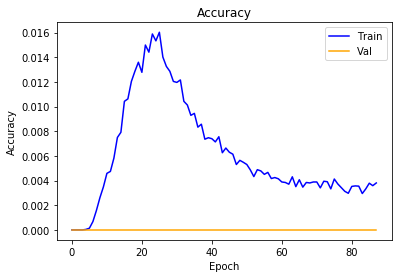

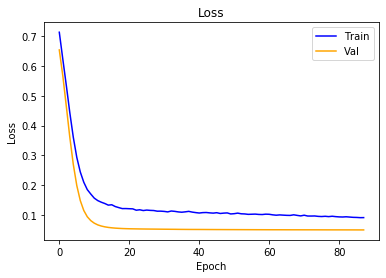

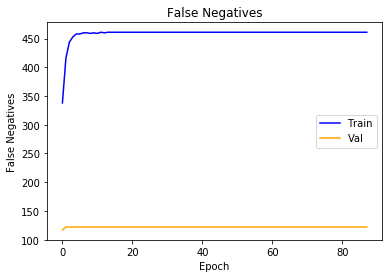

In [203]:
epochs = range(88)

plt.title('Accuracy')
plt.plot(epochs,  history.history['accuracy'], color='blue', label='Train')
plt.plot(epochs, history.history['val_accuracy'], color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

_ = plt.figure()
plt.title('Loss')
plt.plot(epochs, history.history['loss'], color='blue', label='Train')
plt.plot(epochs, history.history['val_loss'], color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

_ = plt.figure()
plt.title('False Negatives')
plt.plot(epochs, history.history['fn'], color='blue', label='Train')
plt.plot(epochs, history.history['val_fn'], color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('False Negatives')
plt.legend()

In [192]:
# df_12.columns

In [204]:
results = model.evaluate(df_12[cap], df_12.redemption_status, verbose=2)
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)

78369/78369 - 5s - loss: 260.9988 - accuracy: 0.9644 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 77640.0000 - fn: 729.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4990
loss :  260.9988140487872
accuracy :  0.9644375
tp :  0.0
fp :  0.0
tn :  77640.0
fn :  729.0
precision :  0.0
recall :  0.0
auc :  0.49900135


In [ ]:
results = model.evaluate(test_features, test_labels, verbose=2)
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)

In [ ]:
results

In [ ]:
from sklearn import metrics

In [ ]:
metrics.roc_auc_score(df_1.redemption_status,results[:,1])

In [ ]:
df_1

In [114]:
cap = ['id', 'campaign_id', 'coupon_id', 'customer_id', 'campaign_type', 'age_range', 'marital_status', 'rented', 'family_size', 'no_of_children', 'income_bracket', 'customer_id_', 'quantity_sum', 'quantity_mean', 'selling_price_sum', 'selling_price_mean', 'other_discount_sum', 'other_discount_mean', 'coupon_discount_sum', 'coupon_discount_size', 'coupon_discount_mean', 'Transaction_date_WEEKDAY_sum', 'Transaction_date_WEEKDAY_mean', 'Start_WEEKDAY', 'end_WEEKDAY', 'start_date_day', 'start_date_month', 'start_date_day_of_week', 'start_date_day_of_year', 'end_date_day', 'end_date_month', 'end_date_day_of_week', 'end_date_day_of_year']

In [ ]:
metrics = [
      keras.metrics.Accuracy(name='accuracy'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc')
      
  ]
import tensorflow.keras as keras
# import keras
import tensorflow.keras.backend as K
# from keras import backend as K
import tensorflow as tf
# from keras.optimizer import Adam
# Define our custom loss function
def focal_loss(y_true, y_pred):
#     gamma = 2.0, alpha = 0.25
    pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
    pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
    return -K.sum(0.25 * K.pow(1. - pt_1, 2.0) * K.log(pt_1))-K.sum((1-0.25) * K.pow( pt_0, 2.0) * K.log(1. - pt_0))

# Compile our model
# adam = Adam(lr=0.0001)
model.compile(loss=[focal_loss], metrics=metrics, optimizer='adam') 

In [ ]:
#model = make_model()

EPOCHS = 300
BATCH_SIZE = 3000

history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(val_features, val_labels))

In [ ]:
results = model.evaluate(df_1[coll], df_1.redemption_status, verbose=2)
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)

In [ ]:
epochs = range(EPOCHS)

plt.title('Accuracy')
plt.plot(epochs,  history.history['accuracy'], color='blue', label='Train')
plt.plot(epochs, history.history['val_accuracy'], color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

_ = plt.figure()
plt.title('Loss')
plt.plot(epochs, history.history['loss'], color='blue', label='Train')
plt.plot(epochs, history.history['val_loss'], color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

_ = plt.figure()
plt.title('False Negatives')
plt.plot(epochs, history.history['fn'], color='blue', label='Train')
plt.plot(epochs, history.history['val_fn'], color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('False Negatives')
plt.legend()

In [ ]:
weight_for_0 = 1 / neg
weight_for_1 = 1 / pos

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2e}'.format(weight_for_0))
print('Weight for class 1: {:.2e}'.format(weight_for_1))

In [ ]:
#weighted_model = make_model()

weighted_history = model.fit(
    train_features,
    train_labels,
    batch_size=1040,
    epochs=20,
    validation_data=(val_features, val_labels),
    class_weight=class_weight)

In [ ]:
class_weight

In [ ]:
params = {
    
    "max_depth" : [2,3,4,5],
    'learning_rate': [0.01,0.1,0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9],
             'n_estimators':[300,400,500,600]
  'n_batches_per_layer': 1,
  # You must enable center_bias = True to get DFCs. This will force the model to
  # make an initial prediction before using any features (e.g. use the mean of
  # the training labels for regression or log odds for classification when
  # using cross entropy loss).
  'center_bias': True
}

est = tf.estimator.BoostedTreesClassifier(coll, **params)
# Train model.
est.train(df_1, max_steps=100)

# Evaluation.
results = est.evaluate(eval_input_fn)
clear_output()
pd.Series(results).to_frame()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

In [ ]:
model_dir = 'F:\\python\\hackathon\\amex'
keras_estimator = tf.keras.estimator.model_to_estimator(
    keras_model=model, model_dir=model_dir)

In [ ]:
keras_estimator.train(input_fn=input_fn, steps=25)
eval_result = keras_estimator.evaluate(input_fn=input_fn, steps=10)
print('Eval result: {}'.format(eval_result))

In [ ]:
model.fit( train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(val_features, val_labels))

In [ ]:
params = {
  'n_trees': 50,
  'max_depth': 3,
  'n_batches_per_layer': 1,
  # You must enable center_bias = True to get DFCs. This will force the model to
  # make an initial prediction before using any features (e.g. use the mean of
  # the training labels for regression or log odds for classification when
  # using cross entropy loss).
  'center_bias': True
}

est = tf.estimator.BoostedTreesClassifier(feature_columns, **params)
# Train model.
est.train(train_input_fn, max_steps=100)

# Evaluation.
results = est.evaluate(eval_input_fn)
clear_output()
pd.Series(results).to_frame()

In [ ]:
coll

In [ ]:
df_1.info()

In [ ]:
df_12.dropna(inplace=True)
y=df['redemption_status']
X = df.drop(['id','redemption_status'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [95]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_12, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = (train_df.pop('redemption_status'))
val_labels = (val_df.pop('redemption_status'))
test_labels = (test_df.pop('redemption_status'))

train_features = (train_df)
val_features = (val_df)
test_features = (test_df)

# Normalize the input features using the sklearn StandardScaler.
# This will set the mean to 0 and standard deviation to 1.
# scaler = StandardScaler()
# train_features = scaler.fit_transform(train_features)
# val_features = scaler.transform(val_features)
# test_features = scaler.transform(test_features)

print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (50156,)
Validation labels shape: (12539,)
Test labels shape: (15674,)
Training features shape: (50156, 33)
Validation features shape: (12539, 33)
Test features shape: (15674, 33)


In [96]:
# 
type(train_features)

pandas.core.frame.DataFrame

In [102]:
fc = tf.feature_column
CATEGORICAL_COLUMNS = ['age_range', 'marital_status', 'family_size', 'no_of_children']
NUMERIC_COLUMNS = ['id', 'campaign_id', 'coupon_id', 'customer_id', 'campaign_type', 'rented', 'income_bracket', 'quantity_sum', 'quantity_mean', 'selling_price_sum', 'selling_price_mean', 'other_discount_sum', 'other_discount_mean', 'coupon_discount_sum', 'coupon_discount_size', 'coupon_discount_mean','Start_WEEKDAY', 'end_WEEKDAY', 'start_date_day', 'start_date_month', 'start_date_day_of_week', 'start_date_day_of_year', 'end_date_day', 'end_date_month', 'end_date_day_of_week', 'end_date_day_of_year']
def one_hot_cat_column(feature_name, vocab):
  return fc.indicator_column(
      fc.categorical_column_with_vocabulary_list(feature_name,
                                                 vocab))
feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  # Need to one-hot encode categorical features.
  vocabulary = df_12[feature_name].unique()
  feature_columns.append(one_hot_cat_column(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(fc.numeric_column(feature_name,
                                           dtype=tf.float32))

In [103]:
# Use entire batch since this is such a small dataset.
NUM_EXAMPLES = len(df_12)

def make_input_fn(X, y, n_epochs=None, shuffle=True):
  def input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((X.to_dict(orient='list'), y))
    if shuffle:
      dataset = dataset.shuffle(NUM_EXAMPLES)
    # For training, cycle thru dataset as many times as need (n_epochs=None).
    dataset = (dataset
      .repeat(n_epochs)
      .batch(NUM_EXAMPLES))
    return dataset
  return input_fn

# Training and evaluation input functions.
train_input_fn = make_input_fn(train_features, train_labels)
eval_input_fn = make_input_fn(test_features, test_labels, shuffle=False, n_epochs=1)
# feature_columns

In [ ]:
params = {
  'n_trees': 50,
  'max_depth': 3,
  'n_batches_per_layer': 1,
  # You must enable center_bias = True to get DFCs. This will force the model to
  # make an initial prediction before using any features (e.g. use the mean of
  # the training labels for regression or log odds for classification when
  # using cross entropy loss).
  'center_bias': True
}

est = tf.estimator.BoostedTreesClassifier(feature_columns, **params)
# Train model.
est.train(train_input_fn, max_steps=100)

# Evaluation.
results = est.evaluate(eval_input_fn)
clear_output()
pd.Series(results).to_frame()

W1005 15:33:12.772279 18248 estimator.py:1799] Using temporary folder as model directory: C:\Users\VIVEKA~1\AppData\Local\Temp\tmppr4s0tjo
W1005 15:33:12.773280 18248 deprecation.py:323] From c:\users\vivek angadi\.conda\envs\tf_gpu\lib\site-packages\tensorflow_estimator\python\estimator\canned\boosted_trees.py:296: VocabularyListCategoricalColumn._num_buckets (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed in a future version.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
W1005 15:33:12.791296 18248 deprecation.py:323] From c:\users\vivek angadi\.conda\envs\tf_gpu\lib\site-packages\tensorflow\python\training\training_util.py:238: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and g

In [ ]:
train_input_fn.to_dict

In [ ]:
type(train_input_fn)

In [ ]:
train_input_fn.make_input_fn

In [ ]:
make_input_fn(train_features, train_labels)

In [ ]:
df_12.columns

In [ ]:
cols1=['id', 'campaign_id', 'coupon_id', 'customer_id','campaign_type', 'age_range', 'marital_status', 'rented', 'family_size', 'no_of_children', 'income_bracket', 'quantity sum', 'quantity mean', 'selling_price sum', 'selling_price mean', 'other_discount sum', 'other_discount mean', 'coupon_discount sum', 'coupon_discount size', 'coupon_discount mean', 'Transaction_date_WEEKDAY sum', 'Transaction_date_WEEKDAY mean', 'Start_WEEKDAY', 'end_WEEKDAY', 'start_date_day', 'start_date_month', 'start_date_day_of_week', 'start_date_day_of_year', 'end_date_day', 'end_date_month', 'end_date_day_of_week', 'end_date_day_of_year']

In [ ]:
from sklearn.model_selection import RandomizedSearchCV